### Name - Subhajit Ghosh
### Roll No - 2102041

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from sklearn_extra.cluster import KMedoids

In [7]:
from sklearn import datasets
myiris = datasets.load_iris()
x = myiris.data
y = myiris.target

In [8]:
y.shape

(150,)

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)

In [11]:
y_kmed

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [12]:
kMedoids.inertia_

131.87877332824291

In [14]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [15]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(x_scaled)
y_kmed = kmedoids.fit_predict(x_scaled)
purity_score(y,y_kmed)

0.84

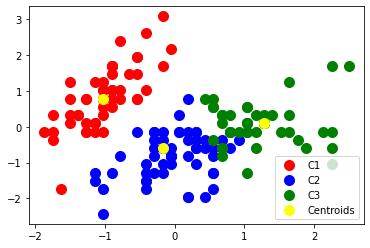

In [16]:
plt.scatter(x_scaled[y_kmed == 0, 0], x_scaled[y_kmed == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x_scaled[y_kmed == 1, 0], x_scaled[y_kmed == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x_scaled[y_kmed == 2, 0], x_scaled[y_kmed == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()